# Taller 04
##### Nombre: David Alejandro Díaz Pineda

In [38]:
import sympy as sym
from IPython.display import display


# ##################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation `S`. Every two points are interpolated by a cubic polynomial
    `S_j` of the form `S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.`

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3

        print(j, a, b, c[j], d)
        splines.append(S)

    splines.reverse()
    return splines

In [39]:
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

Compruebe gráficamente la solución de los siguientes ejercicios:

$$(0,1),(1,5),(2,3)$$

In [40]:
xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

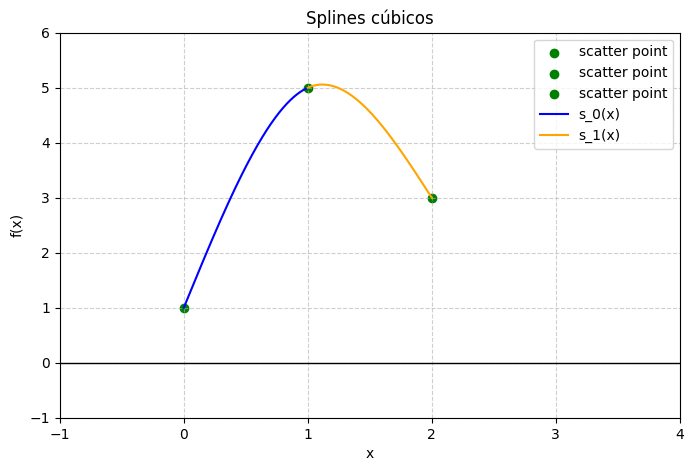

In [41]:
import numpy as np
import matplotlib.pyplot as plt
x0,y0 = 0,1
x1, y1= 1,5
x2, y2= 2,3

xs0 = np.linspace(0, 1, 200)
xs1 = np.linspace(1, 2, 200)


def s_0(x):
    return 1 + 5.5 *x - 1.5 * x **3

def s_1(x):
    return -2 + 14.5*x - 9*x**2 + 1.5*x**3


plt.figure(figsize=(8, 5))
plt.scatter([0.0], [1.0], color='green', label='scatter point')
plt.scatter([1.0], [5.0], color='green', label='scatter point')
plt.scatter([2.0], [3.0], color='green', label='scatter point')
plt.plot(xs0, s_0(xs0), label='s_0(x)', color='blue')
plt.plot(xs1, s_1(xs1), label='s_1(x)', color='orange')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Splines cúbicos')
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plt.show()

$$(0,−5),(1,−4),(2,3)$$

In [42]:
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

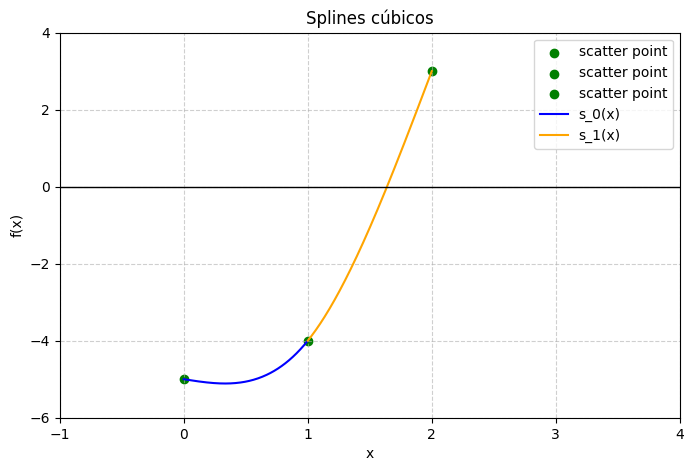

In [43]:
import numpy as np
import matplotlib.pyplot as plt

xs0 = np.linspace(0, 1, 200)
xs1 = np.linspace(1, 2, 200)


def s_0(x):
    return -5-0.5*x + 1.5*x**3

def s_1(x):
    return -2-9.5*x + 9*x**2 -1.5*x**3


plt.figure(figsize=(8, 5))
plt.scatter([0.0], [-5.0], color='green', label='scatter point')
plt.scatter([1.0], [-4.0], color='green', label='scatter point')
plt.scatter([2.0], [3.0], color='green', label='scatter point')
plt.plot(xs0, s_0(xs0), label='s_0(x)', color='blue')
plt.plot(xs1, s_1(xs1), label='s_1(x)', color='orange')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Splines cúbicos')
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-6, 4)
plt.show()

$$(0,−1),(1,1),(2,5),(3,2)$$

In [44]:
xs = [0, 1, 2,3]
ys = [-1, 1, 5,2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

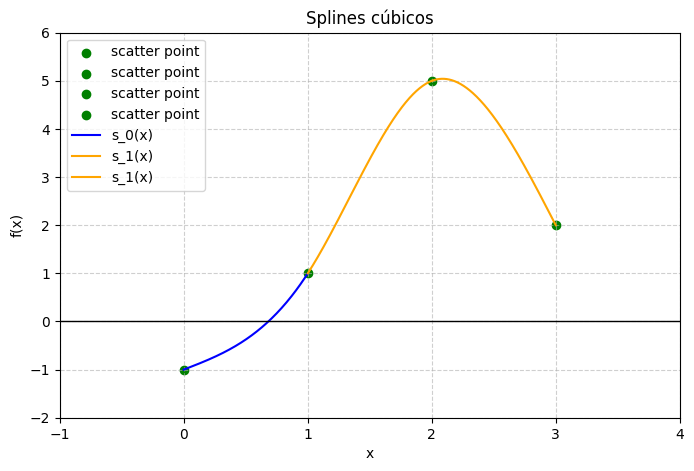

In [48]:
import numpy as np
import matplotlib.pyplot as plt

xs0 = np.linspace(0, 1, 200)
xs1 = np.linspace(1, 2, 200)
xs3 = np.linspace(2, 3, 200)

def s_0(x):
    return 1*x**3+1*x-1

def s_1(x):
    return -3*x**3+12*x**2-11*x+3

def s_2(x):
    return 2*x**3 - 18*x**2+ 49*x -37

plt.figure(figsize=(8, 5))
plt.scatter([0.0], [-1.0], color='green', label='scatter point')
plt.scatter([1.0], [1.0], color='green', label='scatter point')
plt.scatter([2.0], [5.0], color='green', label='scatter point')
plt.scatter([3.0], [2.0], color='green', label='scatter point')

plt.plot(xs0, s_0(xs0), label='s_0(x)', color='blue')
plt.plot(xs1, s_1(xs1), label='s_1(x)', color='orange')
plt.plot(xs3, s_2(xs3), label='s_1(x)', color='orange')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Splines cúbicos')
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-2, 6)
plt.show()

Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con B0=1
 para todos los valores de B1∈R
